In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Dec 12 17:07:52 2019

@author: christopherton
"""

# DataFest

from __future__ import print_function
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.__version__

# Create Dataframe Object
color = pd.Series(['Red', 'White', 'Rose'])
type = pd.Series(['Still', 'Sparkling', 'Fortified'])

pd.DataFrame({ 'color': color, 'wine_type': type })

# Datafest wine Marks
PGHOST="datafest201912.library.ucdavis.edu"
PGDATABASE="postgres"
PGPORT="49152"
PGUSER="anon"
PGPASSWORD="anon"

conn_string = ("host={} port={} dbname={} user={} password={}") \
  .format(PGHOST, PGPORT, PGDATABASE, PGUSER, PGPASSWORD)

conn=psycopg2.connect(conn_string)

# edit SQL string here
sql_command = "SELECT * FROM {}.{};".format("datafest", "mark")
marks = pd.read_sql(sql_command, conn)
marks.describe()

# All pages 
sql_command = "select page_id, p.page_ark from page p"
page = pd.read_sql(sql_command, conn)
print(page['page_ark'])

# Names of Catalogues 
sql_command = "select ark,year,name from catalogs.catalogs order by year;"
catalogs = pd.read_sql(sql_command, conn)
#catalogs



/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


0       d70p4h-000
1       d70p4h-003
2       d70p4h-001
3       d70p4h-002
4       d72g6t-000
           ...    
7259    d7zw8s-020
7260    d7zw8s-022
7261    d7zw8s-018
7262    d7zw8s-004
7263    d7zw8s-008
Name: page_ark, Length: 7264, dtype: object


In [0]:

# Individual Words
sql_command = "SELECT * FROM {} WHERE page_ark='{}';".format("rtesseract_words","d7c30j-001")


(956, 8)
              num         left  ...  confidence      height
count  740.000000   740.000000  ...  740.000000  740.000000
mean   482.805405  1776.201351  ...   94.684791   36.764865
std    264.766744  1013.961510  ...    3.205263    9.133137
min      1.000000   452.000000  ...   80.243248    5.000000
25%    248.750000   916.000000  ...   94.290873   32.000000
50%    478.500000  1560.500000  ...   96.080650   34.000000
75%    712.250000  2519.250000  ...   96.477848   39.000000
max    955.000000  3955.000000  ...   96.995018   98.000000

[8 rows x 7 columns]
              num         left          top  ...       bottom  confidence    height
count   32.000000    32.000000    32.000000  ...    32.000000   32.000000  32.00000
mean   407.968750  2030.281250  2552.250000  ...  2620.812500   93.410394  68.56250
std    365.318905  1028.576035  1935.989753  ...  1925.793049    3.556603  16.14838
min     16.000000   456.000000   394.000000  ...   486.000000   80.243248  51.00000
25%     3

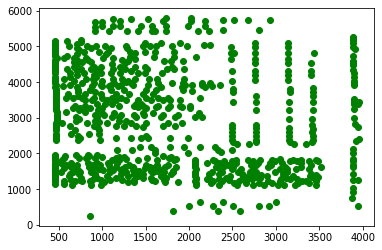

In [46]:
words = pd.read_sql(sql_command, conn)
print(words.shape)
### height of words > mean, conf >80
height = words["bottom"] - words["top"] 
height = pd.DataFrame({"height" : height})
words  = words.join(height)
words= words.sort_values(by='height', ascending=False)
words = words[words["confidence"]>80]


print(words.describe())

large_words = words[words["height"] > 50 ]
print(large_words.describe())
print(large_words.shape)

#plt.scatter(large_words['left'], large_words['top'],color="k")
plt.scatter(words['left'], words['top'],color="g")
plt.show()



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e9fd1fb70>]],
      dtype=object)

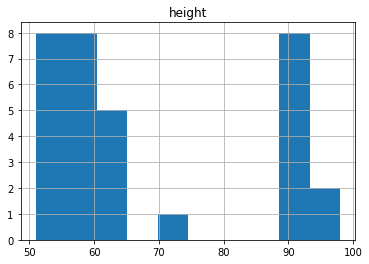

In [47]:
large_words.hist('height')

In [48]:
# area of each word
area = abs(words['right']-words['left']) * abs(words['top']-words['bottom'])
print(sum(words['top']),sum(words['left']))

2169182 1314389


In [49]:
large_words.head(5)

,page_ark,num,left,top,right,bottom,text,confidence,height
18,d7c30j-001,18,2581,394,3314,492,WINE-LOVER,90.177307,98
16,d7c30j-001,16,1815,397,2282,491,SHOULD,94.765694,94
31,d7c30j-001,31,2915,519,3152,611,1967,93.107605,92
30,d7c30j-001,30,2800,518,2885,609,&,93.249924,91
43,d7c30j-001,43,2388,647,3033,738,BORDEAUX,95.981689,91


In [0]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

In [32]:
large_words,_ = make_blobs(n_samples=100, centers=2, cluster_std=0.60, random_state=0,n_features=2)

df = pd.DataFrame(large_words,columns=["top","left"])

kmeans = KMeans(n_clusters=3)

y = kmeans.fit_predict(df[["top","left"]])

df['Cluster'] = y

print(df.head())

        top      left  Cluster
0  3.353209  1.699580        0
1  1.366786  0.634972        2
2  0.224593  4.770282        1
3  0.443599  3.115309        1
4  2.768085  1.087829        0


[[4143.26568266 1123.81918819]
 [1612.83333333 2863.97311828]
 [1849.55612245 1081.12755102]
 [4412.14942529 3048.66666667]]


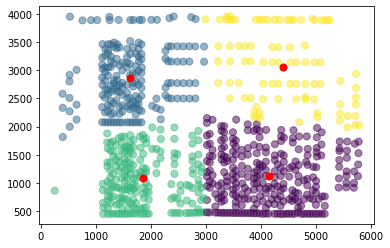

In [53]:
top_left = {"top": list(words['top']),"left":list(words['left'])}
k = pd.DataFrame(top_left)

kmeans = KMeans(n_clusters=4).fit(k)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(k['top'],k['left'],c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

In [56]:
range_n_clusters = list (range(2,10))

df_silh = words.iloc[:,[2,3]].values

for n_clusters in range_n_clusters:
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(df_silh)
    centers = clusterer.cluster_centers_

    score = silhouette_score(df_silh, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
    

For n_clusters = 2, silhouette score is 0.4658496883694508)
For n_clusters = 3, silhouette score is 0.425589908680815)
For n_clusters = 4, silhouette score is 0.43779967281008797)
For n_clusters = 5, silhouette score is 0.43759426923755074)
For n_clusters = 6, silhouette score is 0.41722864275605703)
For n_clusters = 7, silhouette score is 0.37648853713213304)
For n_clusters = 8, silhouette score is 0.38705728386153576)
For n_clusters = 9, silhouette score is 0.39169207942703577)


In [62]:

def find_elbow(data, theta):

    # make rotation matrix
    co = np.cos(theta)
    si = np.sin(theta)
    rotation_matrix = np.array(((co, -si), (si, co)))

    # rotate data vector
    rotated_vector = data.dot(rotation_matrix)

    # return index of elbow
    return np.where(rotated_vector == rotated_vector.min())[0][0]

def get_data_radiant(data):
  return np.arctan2(data[:, 1].max() - data[:, 1].min(), 
                    data[:, 0].max() - data[:, 0].min())

elbow_index = find_elbow(df_silh, get_data_radiant(df_silh))
elbow_index

74

In [64]:
df_silh = words.iloc[:,[2,3]].values
df_silh

array([[2581,  394],
       [1815,  397],
       [2915,  519],
       ...,
       [1222, 1531],
       [1375, 4825],
       [ 865,  249]])

[[4743  512]
 [1107  285]
 [1360  285]
 ...
 [1577 1116]
 [1680 1113]
 [1884 1113]]


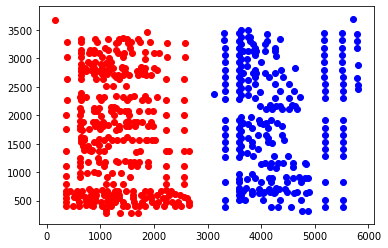

In [81]:

sql_command = "SELECT * FROM {} WHERE page_ark='{}';".format("rtesseract_words","d7q36x-009")
words = pd.read_sql(sql_command, conn)
words

X = words.iloc[:, [2,3]].values

print(X)
kmeans = KMeans(n_clusters = 2,  init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], c='red')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], c='blue')

ls1= list(X[y_kmeans==0, 0])
ls2= list(X[y_kmeans==0, 1])
d1 = pd.DataFrame({'1':ls1,'2':ls2})


In [0]:
kmeans = KMeans(n_clusters = 2,  init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(d1)

plt.scatter(d1[y_kmeans==0, 0], d1[y_kmeans==0, 1], c='red')
plt.scatter(d1[y_kmeans==1, 0], d1[y_kmeans==1, 1], c='blue')

In [80]:
type(words.iloc[:, [2,3]].values)

TypeError: ignored